In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.pandas.set_option('Display.max_columns',None)
pd.pandas.set_option('Display.max_rows',None)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
y_train = train['SalePrice']

In [4]:
# concating the train and test features
train_full = train.copy()
train_full = train.drop(['SalePrice'],axis=1)
features = pd.concat([train_full,test])

<AxesSubplot:>

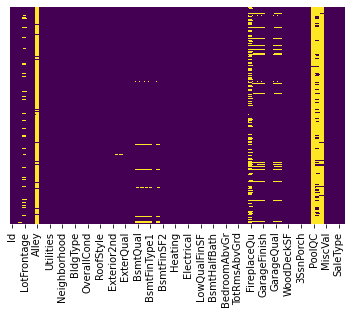

In [5]:
sns.heatmap(features.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
for feature in features.columns:
    if features[feature].isnull().sum() >= 1:
        print(feature ,end=' ')
        print(np.round(features[feature].isnull().mean(),4))

MSZoning 0.0014
LotFrontage 0.1665
Alley 0.9322
Utilities 0.0007
Exterior1st 0.0003
Exterior2nd 0.0003
MasVnrType 0.0082
MasVnrArea 0.0079
BsmtQual 0.0277
BsmtCond 0.0281
BsmtExposure 0.0281
BsmtFinType1 0.0271
BsmtFinSF1 0.0003
BsmtFinType2 0.0274
BsmtFinSF2 0.0003
BsmtUnfSF 0.0003
TotalBsmtSF 0.0003
Electrical 0.0003
BsmtFullBath 0.0007
BsmtHalfBath 0.0007
KitchenQual 0.0003
Functional 0.0007
FireplaceQu 0.4865
GarageType 0.0538
GarageYrBlt 0.0545
GarageFinish 0.0545
GarageCars 0.0003
GarageArea 0.0003
GarageQual 0.0545
GarageCond 0.0545
PoolQC 0.9966
Fence 0.8044
MiscFeature 0.964
SaleType 0.0003


In [7]:
## drop the features which has very much ammount of missing values
## Alley, FireplaceQu, PoolQC, Fence, MiscFeature
features = features.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

<AxesSubplot:>

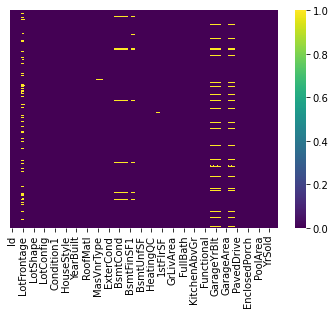

In [8]:
sns.heatmap(features.isnull(),yticklabels=False,cmap='viridis')

In [9]:
cat_features = [feature for feature in features.columns if features[feature].dtype == "O"]

In [10]:
numerical_feature = [feature for feature in features.columns if features[feature].dtype in ['int64','float64'] 
                    and feature not in ['Id']]

In [11]:
# filling missing value of categorical feature with most frequent value
for feature in cat_features:
    features[feature] = features[feature].fillna(features[feature].mode()[0])

In [12]:
# filling missing value of categorical feature with median value
for feature in numerical_feature:
    features[feature] = features[feature].fillna(features[feature].median())

<AxesSubplot:>

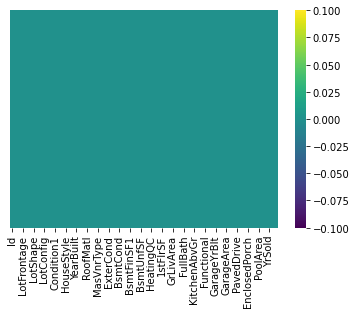

In [13]:
sns.heatmap(features.isnull(),yticklabels=False,cmap='viridis')

In [14]:
features.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


In [15]:
## One Hot encoding of Categorical features
for feature in cat_features:
    df_dummies = pd.get_dummies(features[feature],drop_first=True,prefix=feature)
    features = features.drop([feature],axis=1)
    
    features = pd.concat([features,df_dummies],axis=1)
    

In [16]:
features.shape

(2919, 233)

In [17]:
# Again Seprating into train and test data
X_train = features.iloc[:len(y_train),:]
X_test = features.iloc[len(X_train):,:]

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(1460, 233)
(1459, 233)
(1460,)


In [52]:
## feature selection
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

In [61]:
feature_sel_model = SelectFromModel(XGBRegressor())
feature_sel_model.fit(X_train,y_train)

SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None,
                                       colsample_bylevel=None,
                                       colsample_bynode=None,
                                       colsample_bytree=None, gamma=None,
                                       gpu_id=None, importance_type='gain',
                                       interaction_constraints=None,
                                       learning_rate=None, max_delta_step=None,
                                       max_depth=None, min_child_weight=None,
                                       missing=nan, monotone_constraints=None,
                                       n_estimators=100, n_jobs=None,
                                       num_parallel_tree=None,
                                       random_state=None, reg_alpha=None,
                                       reg_lambda=None, scale_pos_weight=None,
                                       subsample=None, tree_met

In [62]:
feature_sel_model.get_support()

array([False, False, False, False,  True, False, False, False, False,
        True, False, False,  True,  True,  True, False,  True, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [63]:
selected_features = features.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((features.shape[1])))
print('selected features: {}'.format(len(selected_features)))

total features: 233
selected features: 30


In [64]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [65]:
print(X_train.shape)
print(X_test.shape)

(1460, 30)
(1459, 30)


In [66]:
## Hyper Parameter Tuning

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define the grid of hyperparameters to search
hyperparameter = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth':[2, 3, 5, 10, 15],
    'learning_rate':[0.05,0.1,0.15,0.20],
    'min_child_weight':[1,2,3,4],
    'booster':['gbtree','gblinear'],
    'base_score':[0.25,0.5,0.75,1]
    }

xgb_reg = XGBRegressor()

model = RandomizedSearchCV(estimator=xgb_reg,
                           param_distributions=hyperparameter,
                           cv=5, n_iter=50,
                           scoring = 'neg_mean_absolute_error',
                           n_jobs = 4,
                           verbose = 5, 
                           return_train_score = True,
                           random_state=42)
model.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [69]:
model.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
from numpy import nan
XGB_Reg = XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
XGB_Reg.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
y_predicted = XGB_Reg.predict(X_test)

In [77]:
pred = pd.DataFrame(y_predicted)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('house4_submission_XGBR.csv',index=False)